### **Importing Libraries and Datasets**

In [1]:
!pip install --upgrade pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# read data
data = pd.read_csv('ig_id1.csv')


D:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Note: you may need to restart the kernel to use updated packages.


### **Statistical Analysis**



*   follower_following_ratio - The ratio of followers to followee
*   user_biography_length - The length of the user's biography
*   user_follower_count - The number of followers of the user
*   user_following_count - The number of followers of the user
*   user_has_profil_pic - Whether the user has an avatar picture (1 for yes, 0 for no)
*   user_is_private - Whether the user account is private (1 for yes, 0 for no)
*   user_media_count - The number of media posted by the user
*   username_digit_count - The number of digits in the username
*   username_length - The length of username
*   is_fake - Indicates whether it is a fake account (1 for a fake account, 0 for a real account)

In [3]:
data.head()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_profil_pic,user_is_private,user_media_count,username_digit_count,username_length,is_fake
0,0.012907,0.0,25.0,1937.0,1.0,1.0,0.0,0.0,10.0,1.0
1,0.078603,0.0,324.0,4122.0,1.0,0.0,0.0,4.0,15.0,1.0
2,0.037594,0.0,15.0,399.0,0.0,0.0,0.0,3.0,12.0,1.0
3,0.130841,0.0,14.0,107.0,1.0,0.0,1.0,1.0,10.0,1.0
4,0.056762,0.0,264.0,4651.0,1.0,0.0,0.0,0.0,14.0,1.0


In [4]:
data.tail()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_profil_pic,user_is_private,user_media_count,username_digit_count,username_length,is_fake
1189,0.210758,145.0,239.0,1134.0,1.0,0.0,9.0,0.0,19.0,0.0
1190,0.610738,0.0,91.0,149.0,1.0,0.0,7.0,0.0,18.0,0.0
1191,0.099617,28.0,78.0,783.0,1.0,0.0,1.0,0.0,11.0,0.0
1192,0.261122,44.0,135.0,517.0,1.0,0.0,4.0,4.0,11.0,0.0
1193,0.246659,71.0,203.0,823.0,1.0,0.0,4.0,0.0,12.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   follower_following_ratio  1194 non-null   float64
 1   user_biography_length     1194 non-null   float64
 2   user_follower_count       1194 non-null   float64
 3   user_following_count      1194 non-null   float64
 4   user_has_profil_pic       1194 non-null   float64
 5   user_is_private           1194 non-null   float64
 6   user_media_count          1194 non-null   float64
 7   username_digit_count      1194 non-null   float64
 8   username_length           1194 non-null   float64
 9   is_fake                   1194 non-null   float64
dtypes: float64(10)
memory usage: 93.4 KB


In [6]:
# Get the statistical summary of the dataframe
data.describe()

,follower_following_ratio,user_biography_length,user_follower_count,user_following_count,user_has_profil_pic,user_is_private,user_media_count,username_digit_count,username_length,is_fake
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,0.812195,22.847571,369.095477,744.261307,0.922948,0.657454,57.596315,0.495812,11.123953,0.167504
std,0.804559,33.492868,372.775741,1032.526420,0.266786,0.474760,107.402157,1.212010,2.998135,0.373582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.481885,0.000000,152.000000,267.000000,1.000000,0.000000,3.000000,0.000000,9.000000,0.000000
50%,0.839351,7.000000,304.000000,449.000000,1.000000,1.000000,20.000000,0.000000,11.000000,0.000000
75%,1.003664,33.000000,481.000000,711.000000,1.000000,1.000000,67.000000,0.000000,13.000000,0.000000
max,16.800000,150.000000,4492.000000,7497.000000,1.000000,1.000000,1058.000000,10.000000,30.000000,1.000000


In [7]:
# Checking if null values exist
data.isnull().sum()

follower_following_ratio    0
user_biography_length       0
user_follower_count         0
user_following_count        0
user_has_profil_pic         0
user_is_private             0
user_media_count            0
username_digit_count        0
username_length             0
is_fake                     0
dtype: int64

In [8]:
# Get the number of unique values in the "user_has_profil_pic" feature
data['user_has_profil_pic'].value_counts()

user_has_profil_pic
1.0    1102
0.0      92
Name: count, dtype: int64

In [9]:
# Get the number of unique values in "is_fake" (Target column)
data['is_fake'].value_counts()

is_fake
0.0    994
1.0    200
Name: count, dtype: int64

## **Data Visualization**

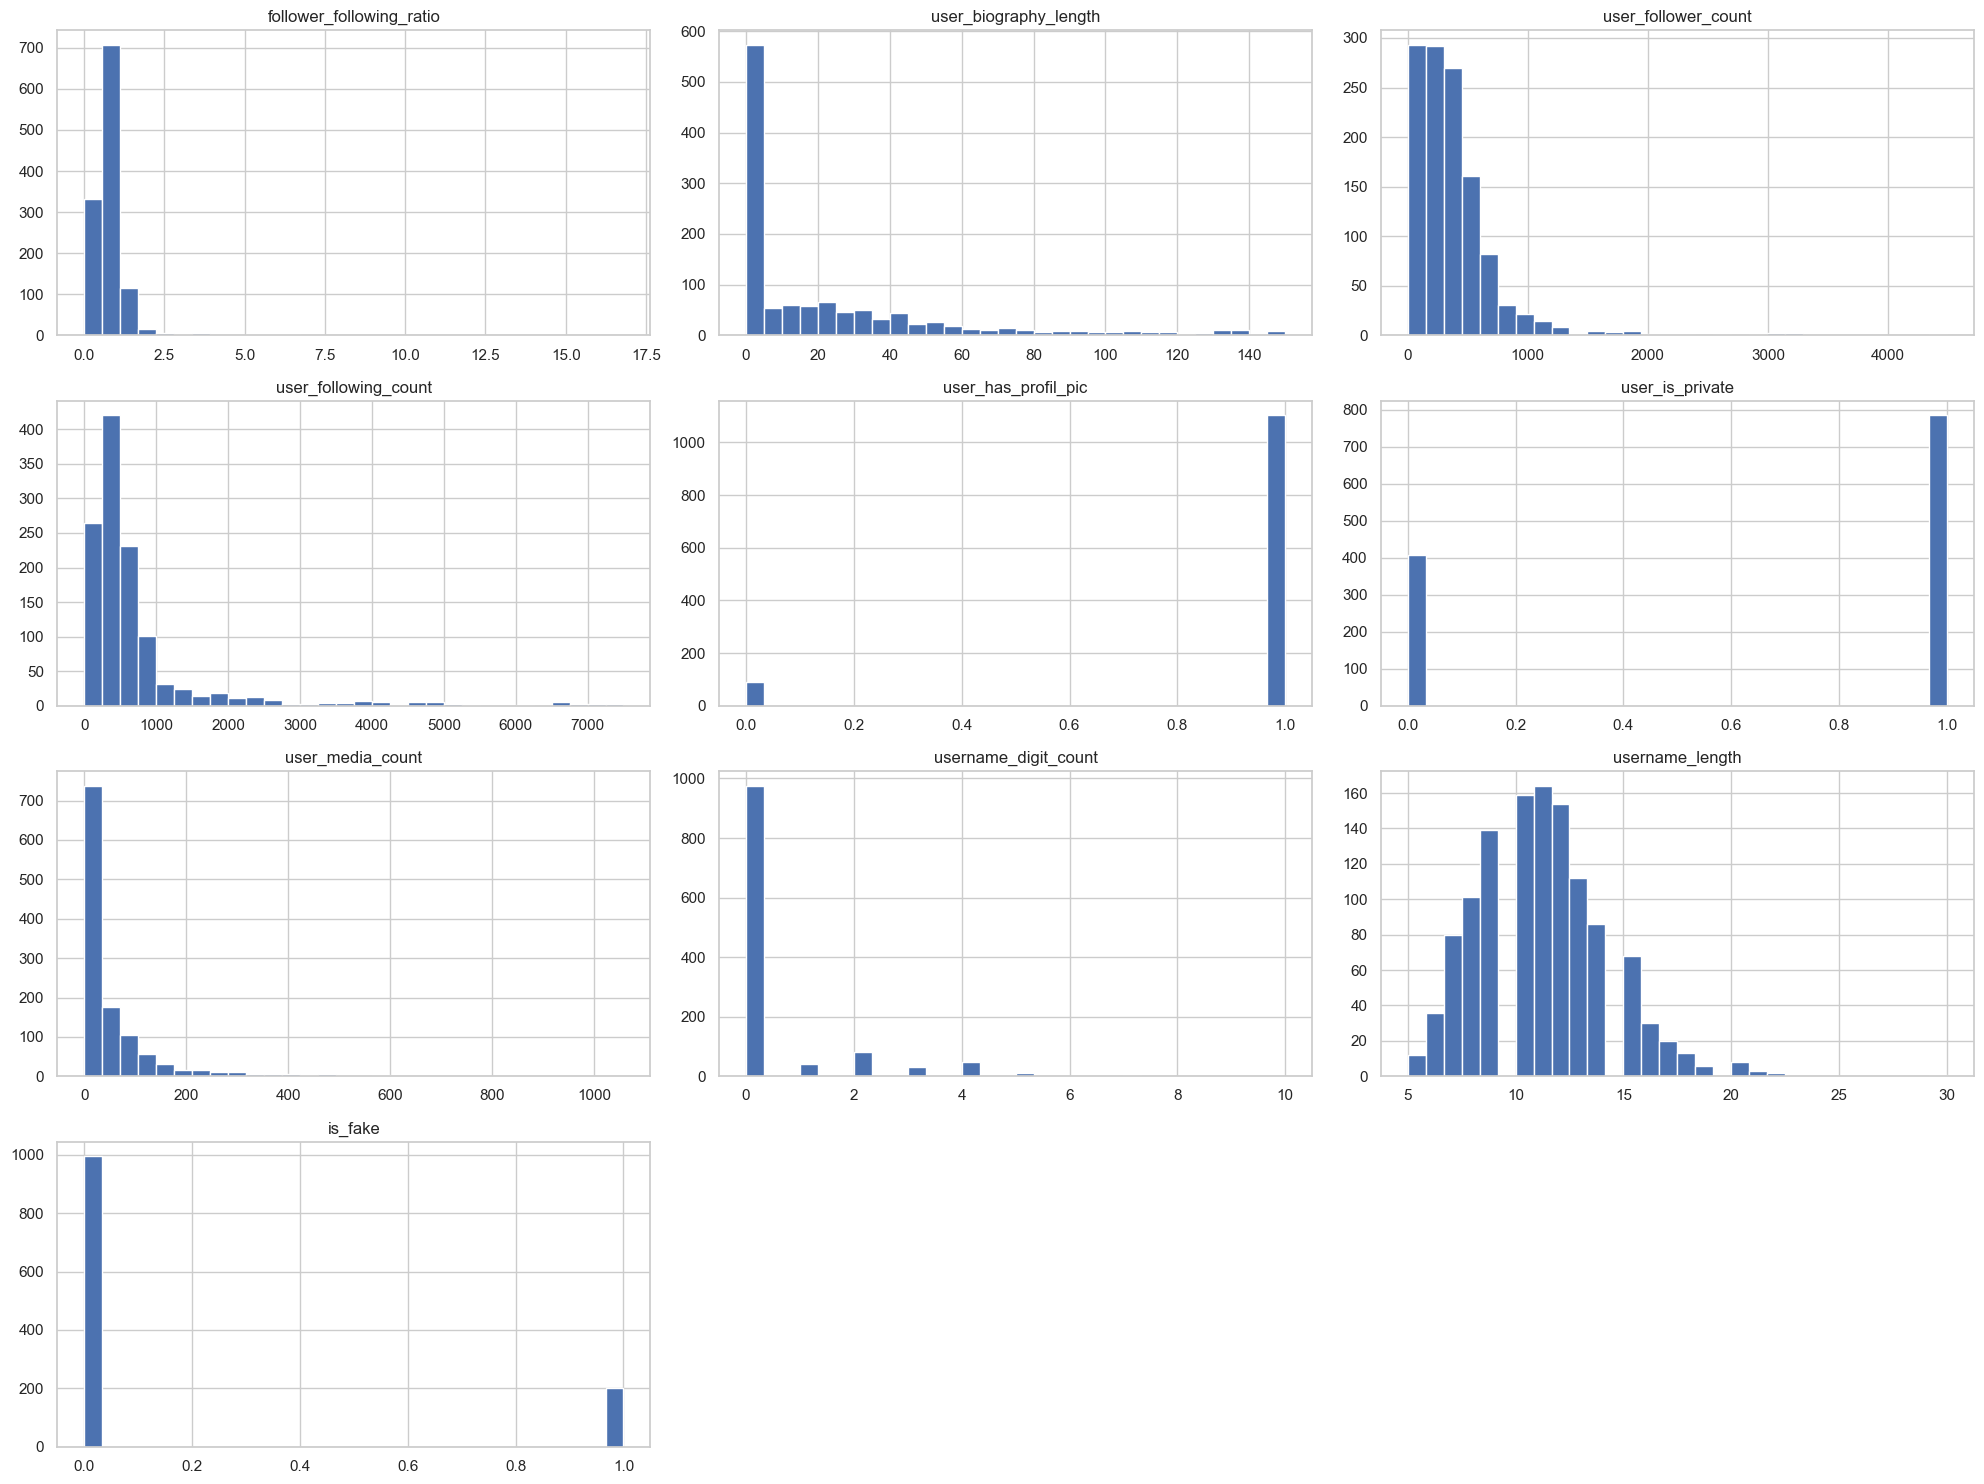

In [10]:
# Set drawing style
sns.set(style="whitegrid")

# Histogram
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

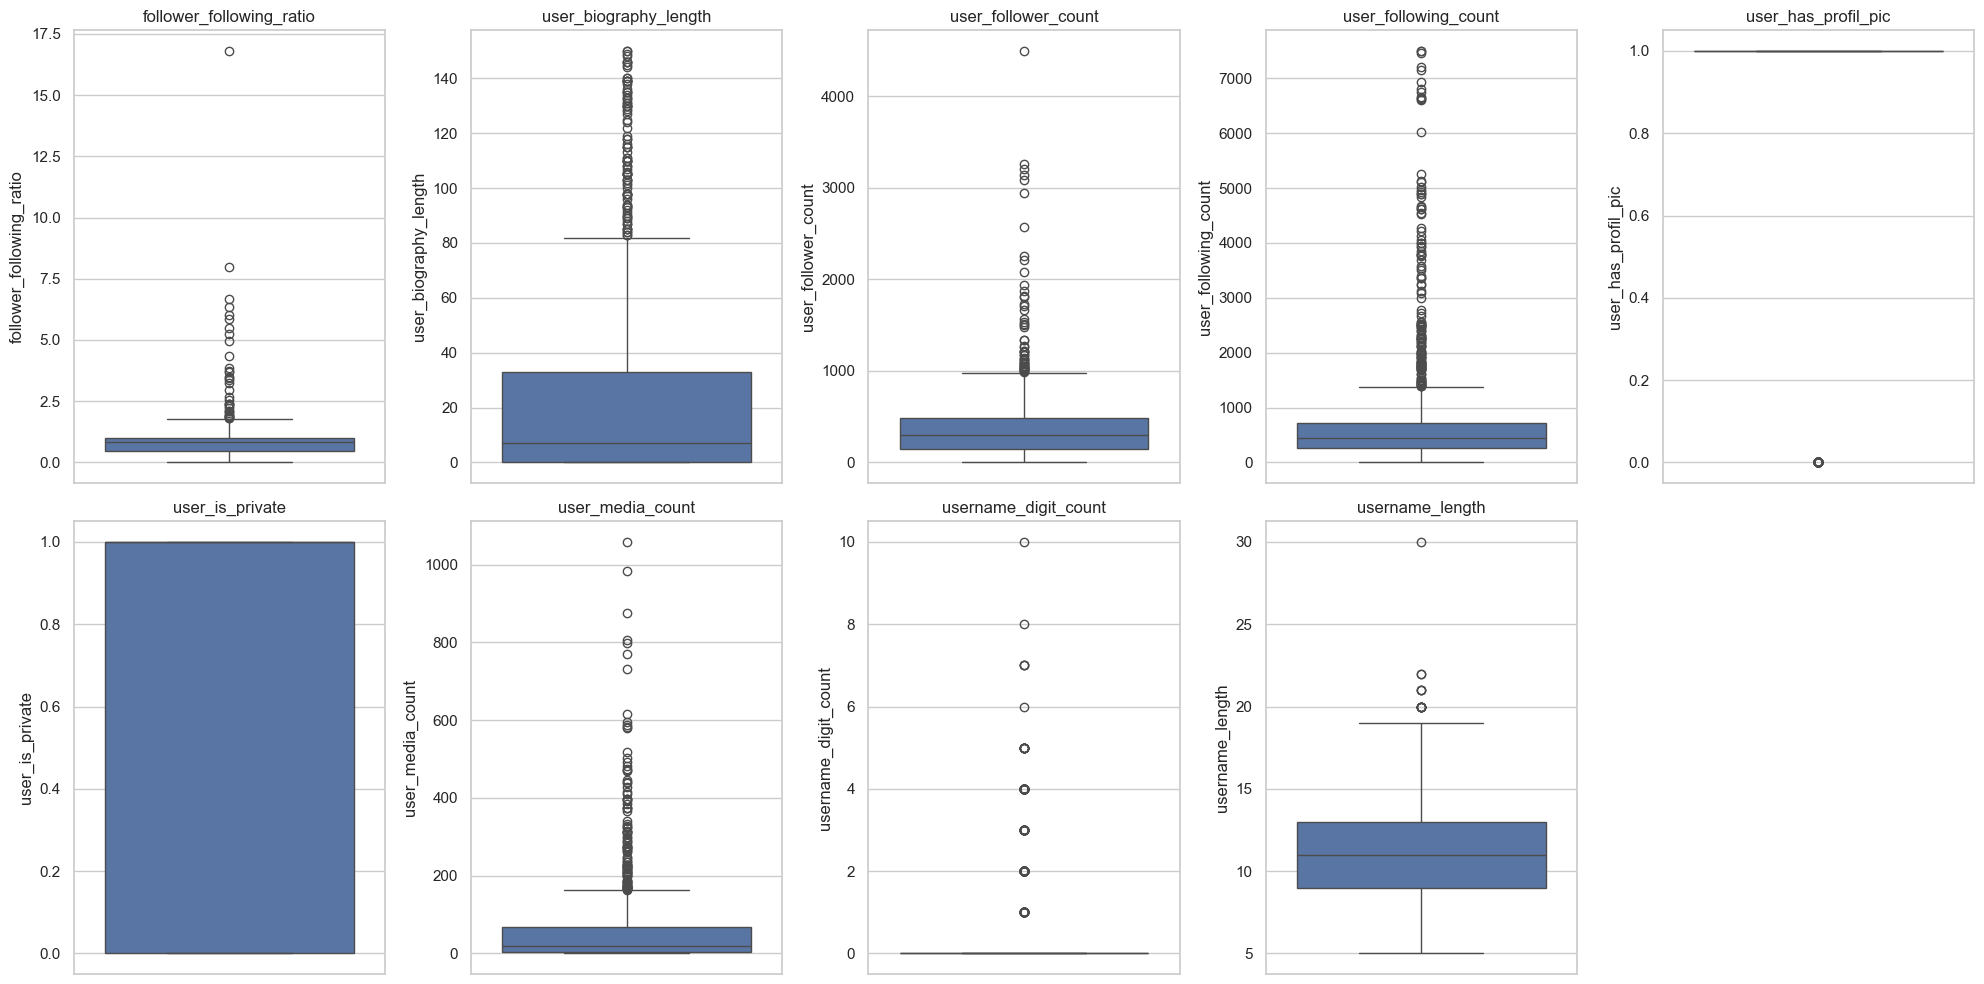

In [11]:
# Box Plot
plt.figure(figsize=(20, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data=data, y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

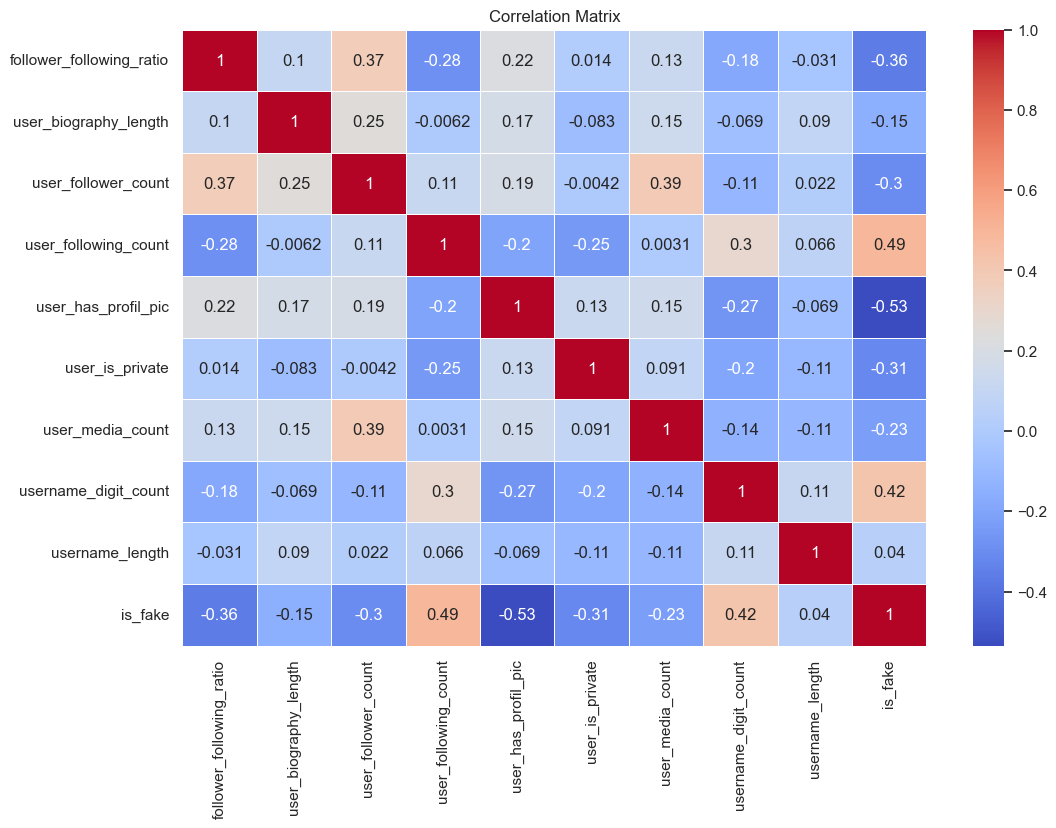

In [12]:
# correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**since 'is_fake' is target column, we want to know the correlation on each features with 'is_fake'**

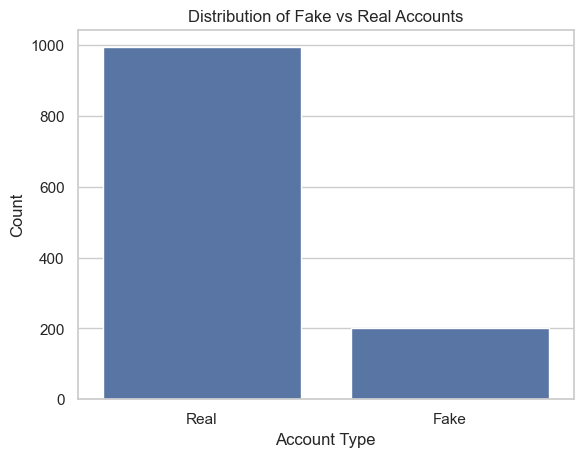

In [13]:
# Plotting the distribution of fake and real accounts
sns.countplot(x='is_fake', data=data)
plt.title('Distribution of Fake vs Real Accounts')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.show()

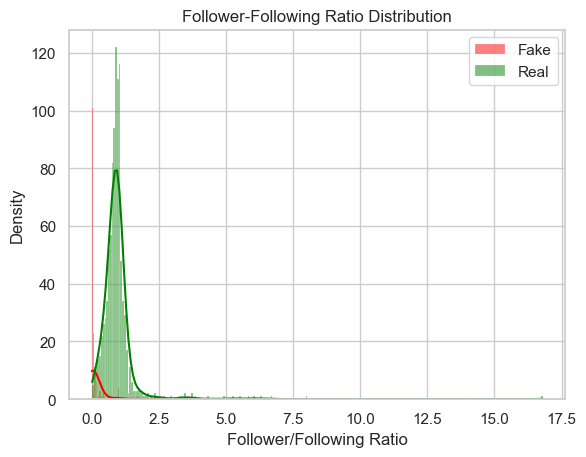

In [14]:
# Follower-Following Ratio Distribution
sns.histplot(data[data['is_fake'] == 1]['follower_following_ratio'], color='red', label='Fake', kde=True)
sns.histplot(data[data['is_fake'] == 0]['follower_following_ratio'], color='green', label='Real', kde=True)
plt.title('Follower-Following Ratio Distribution')
plt.xlabel('Follower/Following Ratio')
plt.ylabel('Density')
plt.legend()
plt.show()

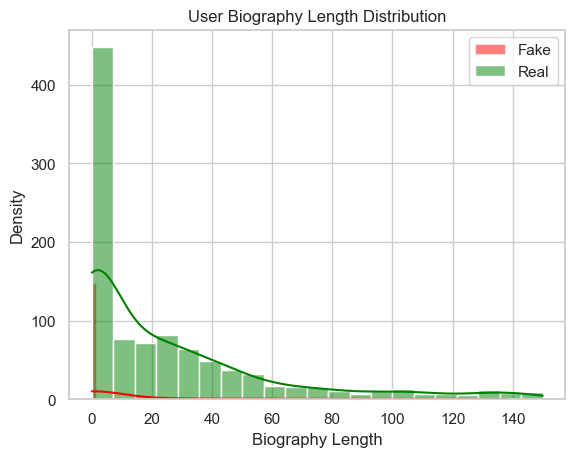

In [15]:
# User Biography Length Distribution
sns.histplot(data[data['is_fake'] == 1]['user_biography_length'], color='red', label='Fake', kde=True)
sns.histplot(data[data['is_fake'] == 0]['user_biography_length'], color='green', label='Real', kde=True)
plt.title('User Biography Length Distribution')
plt.xlabel('Biography Length')
plt.ylabel('Density')
plt.legend()
plt.show()

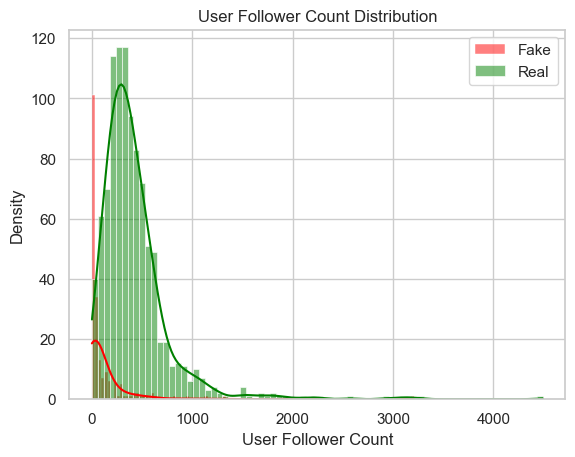

In [16]:
# User Media Count Distribution
sns.histplot(data[data['is_fake'] == 1]['user_follower_count'], color='red', label='Fake', kde=True)
sns.histplot(data[data['is_fake'] == 0]['user_follower_count'], color='green', label='Real', kde=True)
plt.title('User Follower Count Distribution')
plt.xlabel('User Follower Count')
plt.ylabel('Density')
plt.legend()
plt.show()

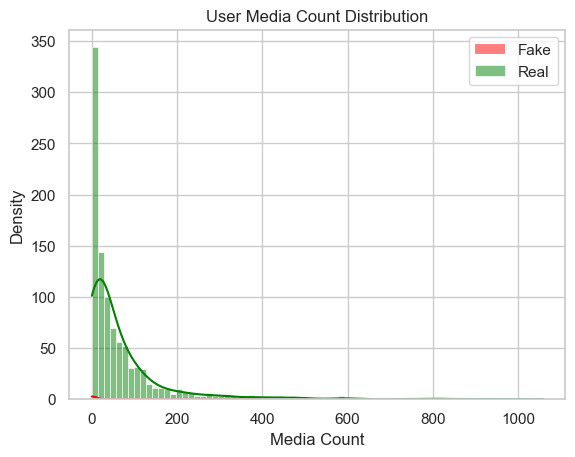

In [17]:
# User Media Count Distribution
sns.histplot(data[data['is_fake'] == 1]['user_media_count'], color='red', label='Fake', kde=True)
sns.histplot(data[data['is_fake'] == 0]['user_media_count'], color='green', label='Real', kde=True)
plt.title('User Media Count Distribution')
plt.xlabel('Media Count')
plt.ylabel('Density')
plt.legend()
plt.show()

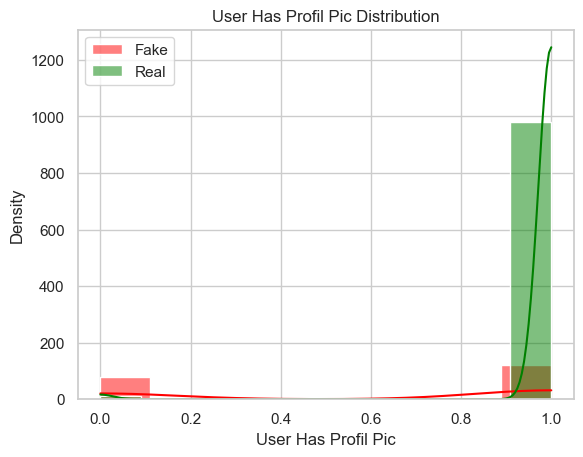

In [18]:
# User Media Count Distribution
sns.histplot(data[data['is_fake'] == 1]['user_has_profil_pic'], color='red', label='Fake', kde=True)
sns.histplot(data[data['is_fake'] == 0]['user_has_profil_pic'], color='green', label='Real', kde=True)
plt.title('User Has Profil Pic Distribution')
plt.xlabel('User Has Profil Pic')
plt.ylabel('Density')
plt.legend()
plt.show()

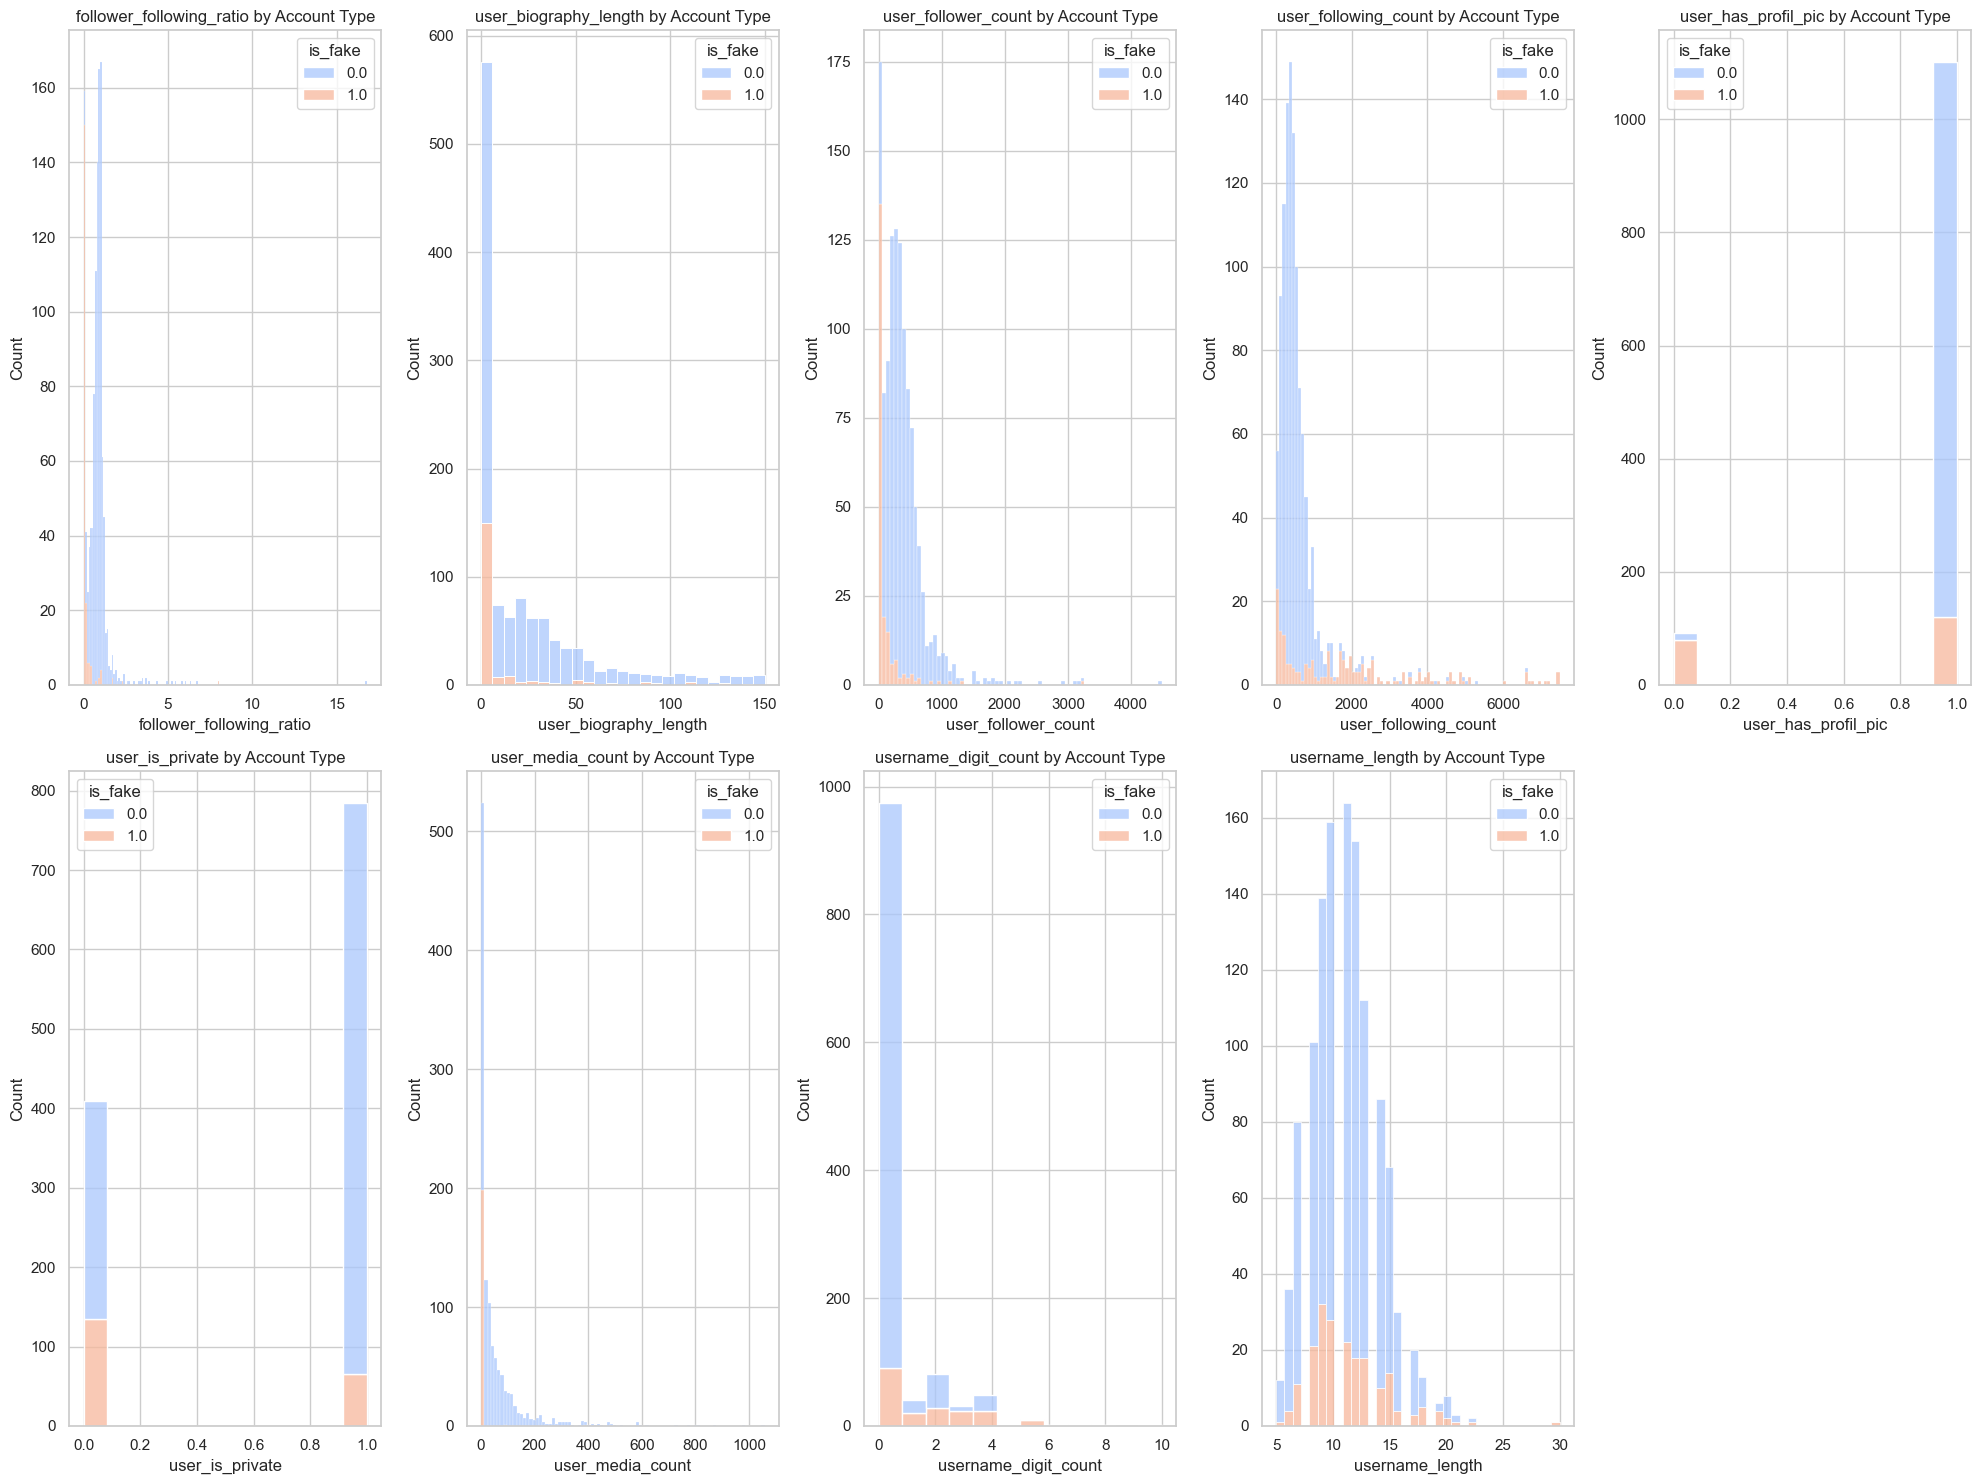

In [19]:
# Comparison of real and fake accounts with features
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 5, i)
    sns.histplot(data, x=column, hue='is_fake', multiple='stack', palette='coolwarm')
    plt.title(f'{column} by Account Type')
plt.tight_layout()
plt.show()



*   **follower_following_ratio**: There is a noticeable difference in the distribution of the follower-following ratio between fake accounts (is_fake = 1) and real accounts (is_fake = 0), with real accounts typically having a higher ratio.
*   **user_biography_length**: Real accounts tend to have longer biographies, whereas fake accounts often have shorter or no biography.
*   **user_follower_count** **and** **user_following_count**: Real accounts have a broader distribution in terms of follower counts, while fake accounts tend to have fewer followers. Following count does not appear to be significantly distinctive in differentiating between fake and real accounts.
*   **user_has_profil_pic**: The vast majority of accounts have profile pictures, but a slightly higher proportion of fake accounts do not have profile pictures.
*   **user_is_private**: A higher proportion of fake accounts are set to private.
*   **user_media_count**: Real accounts typically have more media posts.
*   **username_digit_count**: Fake accounts tend to include more numbers in their usernames.
*   **username_length**: Real accounts show more variety in username length, whereas fake accounts tend to have more uniform lengths.







### **Data/Feature preprocessing**

In [20]:
# Data preprocessing
# Handling outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in ['follower_following_ratio', 'user_biography_length', 'user_follower_count',
               'user_following_count', 'user_media_count', 'username_digit_count', 'username_length']:
    data = remove_outliers(data, column)

# Separate features and labels
X = data.drop('is_fake', axis=1)
y = data['is_fake']

# Dealing with imbalanced data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature selection
selector = SelectKBest(f_classif, k=8)
X_resampled_selected = selector.fit_transform(X_resampled, y_resampled)

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled, test_size=0.2, random_state=42)

# Standardized features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output standardized features
print(X_train_scaled)

[[-1.02382385 -0.64022449 -0.82768052 ... -1.40118863 -0.60095485
  -1.12849982]
 [ 0.71917057 -0.64022449  0.70338684 ...  0.84217801  1.38853035
   0.42919538]
 [-0.26025701 -0.64022449 -0.91356654 ...  0.84217801 -0.62169027
  -0.7092296 ]
 ...
 [ 0.20409123 -0.64022449 -0.86242093 ... -0.10385853 -0.62169027
  -0.7092296 ]
 [-1.21599617 -0.64022449 -0.93991174 ...  0.03379184 -0.56765637
  -0.46649656]
 [-0.81821678 -0.64022449 -0.95458179 ... -1.40118863 -0.62169027
  -0.0589066 ]]


D:\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### **Data Modelling**

*   **Logistic Regression**
*   **Random Forest Classifier**
*   **Gradient Boosting Classifier**
*   **Support Vector Machine(SVC)**

In [21]:
# evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, prec, rec, f1

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg_results = evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf_results = evaluate_model(rf, X_train_scaled, y_train, X_test_scaled, y_test)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc_results = evaluate_model(gbc, X_train_scaled, y_train, X_test_scaled, y_test)

# Support Vector Machine
svm = SVC(random_state=42)
svm_results = evaluate_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)




*   **LSTM**


In [22]:
# LSTM
# [samples, time_steps, features]
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu', return_sequences=True))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(64, activation='relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))

# complie model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining early stopping callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train model
lstm_epochs_hist = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# prediction
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).reshape(-1)

# evaulate model
lstm_acc = accuracy_score(y_test, y_pred_lstm)
lstm_prec = precision_score(y_test, y_pred_lstm)
lstm_rec = recall_score(y_test, y_pred_lstm)
lstm_f1 = f1_score(y_test, y_pred_lstm)

9/9 [==============================] - 0s 4ms/step


In [23]:
print(lstm_epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


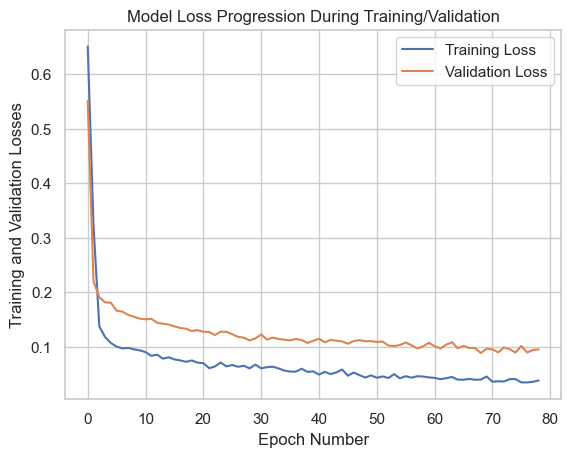

In [24]:
plt.plot(lstm_epochs_hist.history['loss'], label='Training Loss')
plt.plot(lstm_epochs_hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend()
plt.show()


*   **Deep Learning Models - Neural Network**



In [25]:
# Deep Learning Models
nn_model = Sequential()
nn_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
nn_epochs_hist = nn_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype(int).reshape(-1)
nn_acc = accuracy_score(y_test, y_pred_nn)
nn_prec = precision_score(y_test, y_pred_nn)
nn_rec = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

9/9 [==============================] - 0s 3ms/step


In [26]:
print(nn_epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


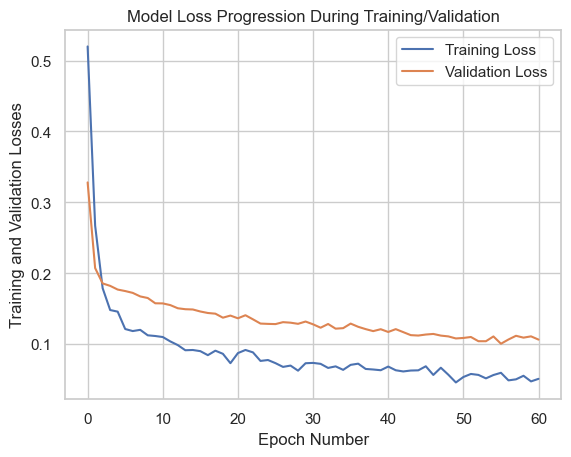

In [27]:
plt.plot(nn_epochs_hist.history['loss'], label='Training Loss')
plt.plot(nn_epochs_hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend()
plt.show()

* Both the training loss and validation loss are decreasing rapidly, indicating that the model is learning from the training data and improving its prediction accuracy rapidly in the early stages.
* As the number of training epochs increases, both the training loss and validation loss gradually stabilize. This usually means that the model is approaching the limit of its learning potential and further training may bring limited improvement.
* The training loss and validation loss are close and parallel, which is a good sign that the model has good generalization ability to unseen data. In this case, the model does not show obvious overfitting characteristics.
* Overall, model shows good learning and generalization behavior. The close and parallel trends of the training loss and validation loss indicate that the model has stable performance on both the training set and the validation set, and there is no obvious overfitting problem. This means that the model can adapt well to new, unseen data.





**visualization and summary the metric on all models**

In [28]:
# summary results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'LSTM', 'Neural Network'],
    'Accuracy': [log_reg_results[0], rf_results[0], gbc_results[0], svm_results[0], lstm_acc, nn_acc],
    'Precision': [log_reg_results[1], rf_results[1], gbc_results[1], svm_results[1], lstm_prec, nn_prec],
    'Recall': [log_reg_results[2], rf_results[2], gbc_results[2], svm_results[2], lstm_rec, nn_rec],
    'F1 Score': [log_reg_results[3], rf_results[3], gbc_results[3], svm_results[3], lstm_f1, nn_f1]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.967626   0.947712  0.993151  0.969900
1        Random Forest  0.992806   0.986486  1.000000  0.993197
2    Gradient Boosting  0.985612   0.973333  1.000000  0.986486
3                  SVM  0.971223   0.953947  0.993151  0.973154
4                 LSTM  0.989209   0.979866  1.000000  0.989831
5       Neural Network  0.985612   0.973333  1.000000  0.986486


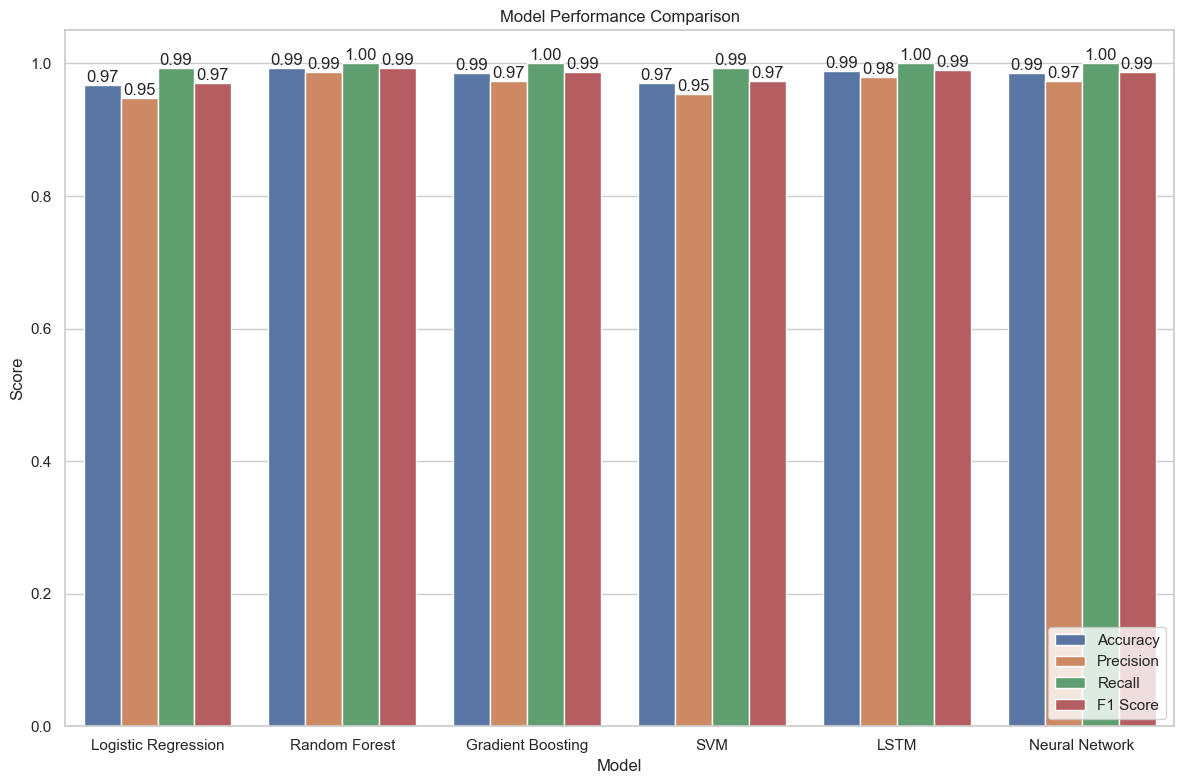

In [29]:
# Integrate and visualize the results
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=results_melted)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='lower right')

# Labeling values ​​on a bar graph
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

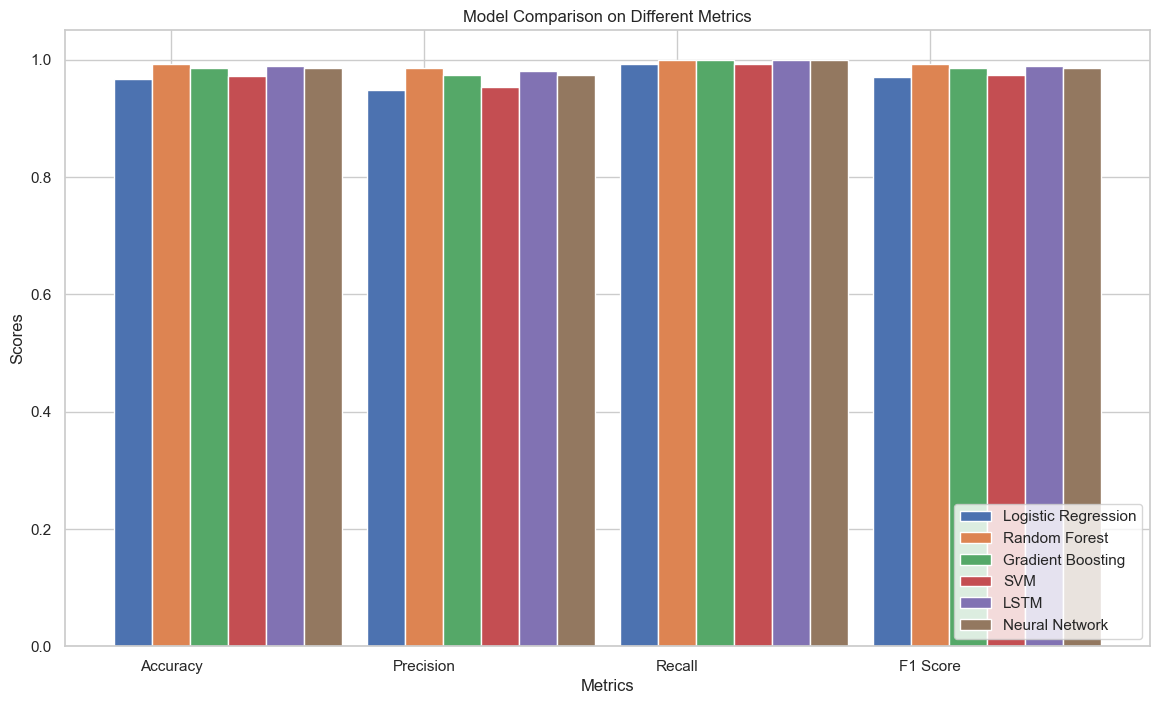

In [30]:
# store all metric of each model into a dictionary
metrics = {
    'Logistic Regression': [log_reg_results[0], log_reg_results[1], log_reg_results[2], log_reg_results[3]],
    'Random Forest': [rf_results[0], rf_results[1], rf_results[2], rf_results[3]],
    'Gradient Boosting': [gbc_results[0], gbc_results[1], gbc_results[2], gbc_results[3]],
    'SVM': [svm_results[0], svm_results[1], svm_results[2], svm_results[3]],
    'LSTM': [lstm_acc, lstm_prec, lstm_rec, lstm_f1],
    'Neural Network': [nn_acc, nn_prec, nn_rec, nn_f1]
}

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Set the position and width of the bar graph
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(14, 8))
for i, (model, scores) in enumerate(metrics.items()):
    ax.bar(x + i * width, scores, width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison on Different Metrics')
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')
plt.show()